In [ ]:
import random
import math
import numpy as np
import time

text = 'O gato comeu o rato'

print(f"Starting on text:\n  --------------------------\n {text} \n ----------------------------\n")
words = text.split()
n = len(words)

population_size = 10

population = [" ".join(random.sample(words, n)) for _ in range(population_size*20)]
population.append(" ".join(words))

Starting on text:
  --------------------------
 O gato comeu o rato 
 ----------------------------



In [ ]:
population

['gato O rato comeu o',
 'o gato O comeu rato',
 'O gato rato o comeu',
 'o gato comeu O rato',
 'rato gato O comeu o',
 'comeu rato gato O o',
 'comeu rato O gato o',
 'o comeu O rato gato',
 'rato comeu o gato O',
 'rato gato o O comeu',
 'o O comeu rato gato',
 'comeu gato rato o O',
 'rato gato O comeu o',
 'rato o comeu gato O',
 'o O gato rato comeu',
 'o O gato rato comeu',
 'comeu gato O rato o',
 'o comeu O gato rato',
 'rato comeu O gato o',
 'rato o gato O comeu',
 'gato rato comeu O o',
 'o rato O comeu gato',
 'gato o comeu rato O',
 'rato comeu o O gato',
 'gato comeu O rato o',
 'o rato gato O comeu',
 'comeu O o rato gato',
 'rato O gato comeu o',
 'o O comeu rato gato',
 'rato gato comeu o O',
 'O o gato comeu rato',
 'rato comeu o gato O',
 'comeu rato gato O o',
 'O o gato rato comeu',
 'comeu gato o O rato',
 'o O comeu rato gato',
 'rato comeu gato O o',
 'comeu o gato O rato',
 'gato rato O o comeu',
 'gato rato o O comeu',
 'rato O comeu gato o',
 'o gato comeu r

In [ ]:
import numpy as np

scores = [10, 20, 2, 3]
np.argsort(scores)

array([2, 3, 0, 1])

## Full Implementation

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
from prettytable import PrettyTable

In [ ]:
# Define the fitness function (objective is to create the flattest U-shape)
def fitness_function(params):
    a, b, c = params
    if a <= 0:
        return -float('inf')  # Penalize downward facing u-shapes heavily
    vertex_x = -b / (2 * a) #x value at vertex
    vertex_y = a * (vertex_x ** 2) + b * vertex_x + c #y value at vertex
    y_left = a * (-1) ** 2 + b * (-1) + c #y-coordinate at x = -1
    y_right = a * (1) ** 2 + b * (1) + c #y-coordinate at x = 1
    curviness = abs(y_left - vertex_y) + abs(y_right - vertex_y)
    return -curviness  # Negate to minimize curviness

In [ ]:
# Create the initial population
def create_initial_population(size, lower_bound, upper_bound):
    population = []
    for _ in range(size):
        individual = (random.uniform(lower_bound, upper_bound),
                      random.uniform(lower_bound, upper_bound),
                      random.uniform(lower_bound, upper_bound))
        population.append(individual)
    return population

In [ ]:
# Selection function using tournament selection
def selection(population, fitnesses, tournament_size=3):
    selected = []
    for _ in range(len(population)):
        tournament = random.sample(list(zip(population, fitnesses)), tournament_size)
        winner = max(tournament, key=lambda x: x[1])[0]
        selected.append(winner)
    return selected

In [ ]:
# Crossover function
def crossover(parent1, parent2):
    alpha = random.random()
    child1 = tuple(alpha * p1 + (1 - alpha) * p2 for p1, p2 in zip(parent1, parent2))
    child2 = tuple(alpha * p2 + (1 - alpha) * p1 for p1, p2 in zip(parent1, parent2))
    return child1, child2

In [ ]:
# Mutation function
def mutation(individual, mutation_rate, lower_bound, upper_bound):
    individual = list(individual)
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            mutation_amount = random.uniform(-1, 1)
            individual[i] += mutation_amount
            # Ensure the individual stays within bounds
            individual[i] = max(min(individual[i], upper_bound), lower_bound)
    return tuple(individual)

In [ ]:
# Main genetic algorithm function
def genetic_algorithm(population_size, lower_bound, upper_bound, generations, mutation_rate):
    population = create_initial_population(population_size, lower_bound, upper_bound)

    # Prepare for plotting
    fig, axs = plt.subplots(3, 1, figsize=(12, 18))  # 3 rows, 1 column for subplots
    best_performers = []
    all_populations = []

    # Prepare for table
    table = PrettyTable()
    table.field_names = ["Generation", "a", "b", "c", "Fitness"]

    for generation in range(generations):
        fitnesses = [fitness_function(ind) for ind in population]

        # Store the best performer of the current generation
        best_individual = max(population, key=fitness_function)
        best_fitness = fitness_function(best_individual)
        best_performers.append((best_individual, best_fitness))
        all_populations.append(population[:])
        table.add_row([generation + 1, best_individual[0], best_individual[1], best_individual[2], best_fitness])

        population = selection(population, fitnesses)

        next_population = []
        for i in range(0, len(population), 2):
            parent1 = population[i]
            parent2 = population[i + 1]

            child1, child2 = crossover(parent1, parent2)

            next_population.append(mutation(child1, mutation_rate, lower_bound, upper_bound))
            next_population.append(mutation(child2, mutation_rate, lower_bound, upper_bound))

        # Replace the old population with the new one, preserving the best individual
        next_population[0] = best_individual
        population = next_population

    # Print the table
    print(table)

    # Plot the population of one generation (last generation)
    final_population = all_populations[-1]
    final_fitnesses = [fitness_function(ind) for ind in final_population]

    axs[0].scatter(range(len(final_population)), [ind[0] for ind in final_population], color='blue', label='a')
    axs[0].scatter([final_population.index(best_individual)], [best_individual[0]], color='cyan', s=100, label='Best Individual a')
    axs[0].set_ylabel('a', color='blue')
    axs[0].legend(loc='upper left')

    axs[1].scatter(range(len(final_population)), [ind[1] for ind in final_population], color='green', label='b')
    axs[1].scatter([final_population.index(best_individual)], [best_individual[1]], color='magenta', s=100, label='Best Individual b')
    axs[1].set_ylabel('b', color='green')
    axs[1].legend(loc='upper left')

    axs[2].scatter(range(len(final_population)), [ind[2] for ind in final_population], color='red', label='c')
    axs[2].scatter([final_population.index(best_individual)], [best_individual[2]], color='yellow', s=100, label='Best Individual c')
    axs[2].set_ylabel('c', color='red')
    axs[2].set_xlabel('Individual Index')
    axs[2].legend(loc='upper left')

    axs[0].set_title(f'Final Generation ({generations}) Population Solutions')

    # Plot the values of a, b, and c over generations
    generations_list = range(1, len(best_performers) + 1)
    a_values = [ind[0][0] for ind in best_performers]
    b_values = [ind[0][1] for ind in best_performers]
    c_values = [ind[0][2] for ind in best_performers]
    fig, ax = plt.subplots()
    ax.plot(generations_list, a_values, label='a', color='blue')
    ax.plot(generations_list, b_values, label='b', color='green')
    ax.plot(generations_list, c_values, label='c', color='red')
    ax.set_xlabel('Generation')
    ax.set_ylabel('Parameter Values')
    ax.set_title('Parameter Values Over Generations')
    ax.legend()

    # Plot the fitness values over generations
    best_fitness_values = [fit[1] for fit in best_performers]
    min_fitness_values = [min([fitness_function(ind) for ind in population]) for population in all_populations]
    max_fitness_values = [max([fitness_function(ind) for ind in population]) for population in all_populations]
    fig, ax = plt.subplots()
    ax.plot(generations_list, best_fitness_values, label='Best Fitness', color='black')
    ax.fill_between(generations_list, min_fitness_values, max_fitness_values, color='gray', alpha=0.5, label='Fitness Range')
    ax.set_xlabel('Generation')
    ax.set_ylabel('Fitness')
    ax.set_title('Fitness Over Generations')
    ax.legend()

    # Plot the quadratic function for each generation
    fig, ax = plt.subplots()
    colors = plt.cm.viridis(np.linspace(0, 1, generations))
    for i, (best_ind, best_fit) in enumerate(best_performers):
        color = colors[i]
        a, b, c = best_ind
        x_range = np.linspace(lower_bound, upper_bound, 400)
        y_values = a * (x_range ** 2) + b * x_range + c
        ax.plot(x_range, y_values, color=color)

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Quadratic Function')

    # Create a subplot for the colorbar
    cax = fig.add_axes([0.92, 0.2, 0.02, 0.6])  # [left, bottom, width, height]
    norm = plt.cm.colors.Normalize(vmin=0, vmax=generations)
    sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
    sm.set_array([])
    fig.colorbar(sm, ax=ax, cax=cax, orientation='vertical', label='Generation')

    plt.show()

    return max(population, key=fitness_function)

+------------+----------------------+----------------------+---------------------+----------------------+
| Generation |          a           |          b           |          c          |       Fitness        |
+------------+----------------------+----------------------+---------------------+----------------------+
|     1      |  7.269938736380986   | 0.19156386570487882  |  18.96036082760301  | -14.542401339604218  |
|     2      |  6.057358068181978   |  0.518676758402135   |  11.940620894903606 | -12.136922647575474  |
|     3      |  6.057358068181978   |  0.518676758402135   |  11.940620894903606 | -12.136922647575474  |
|     4      |  4.202147727765128   |  -4.75421247269755   | -11.596135250383698 | -11.093698315668865  |
|     5      |  4.876447175612459   |  -2.255440411477837  |  -5.832989872628932 | -10.274484277920722  |
|     6      |  4.563376188554327   | -2.2179931850112418  |  -4.600835930680996 |  -9.665771467962394  |
|     7      |  3.9681462082698284  | -0.51070

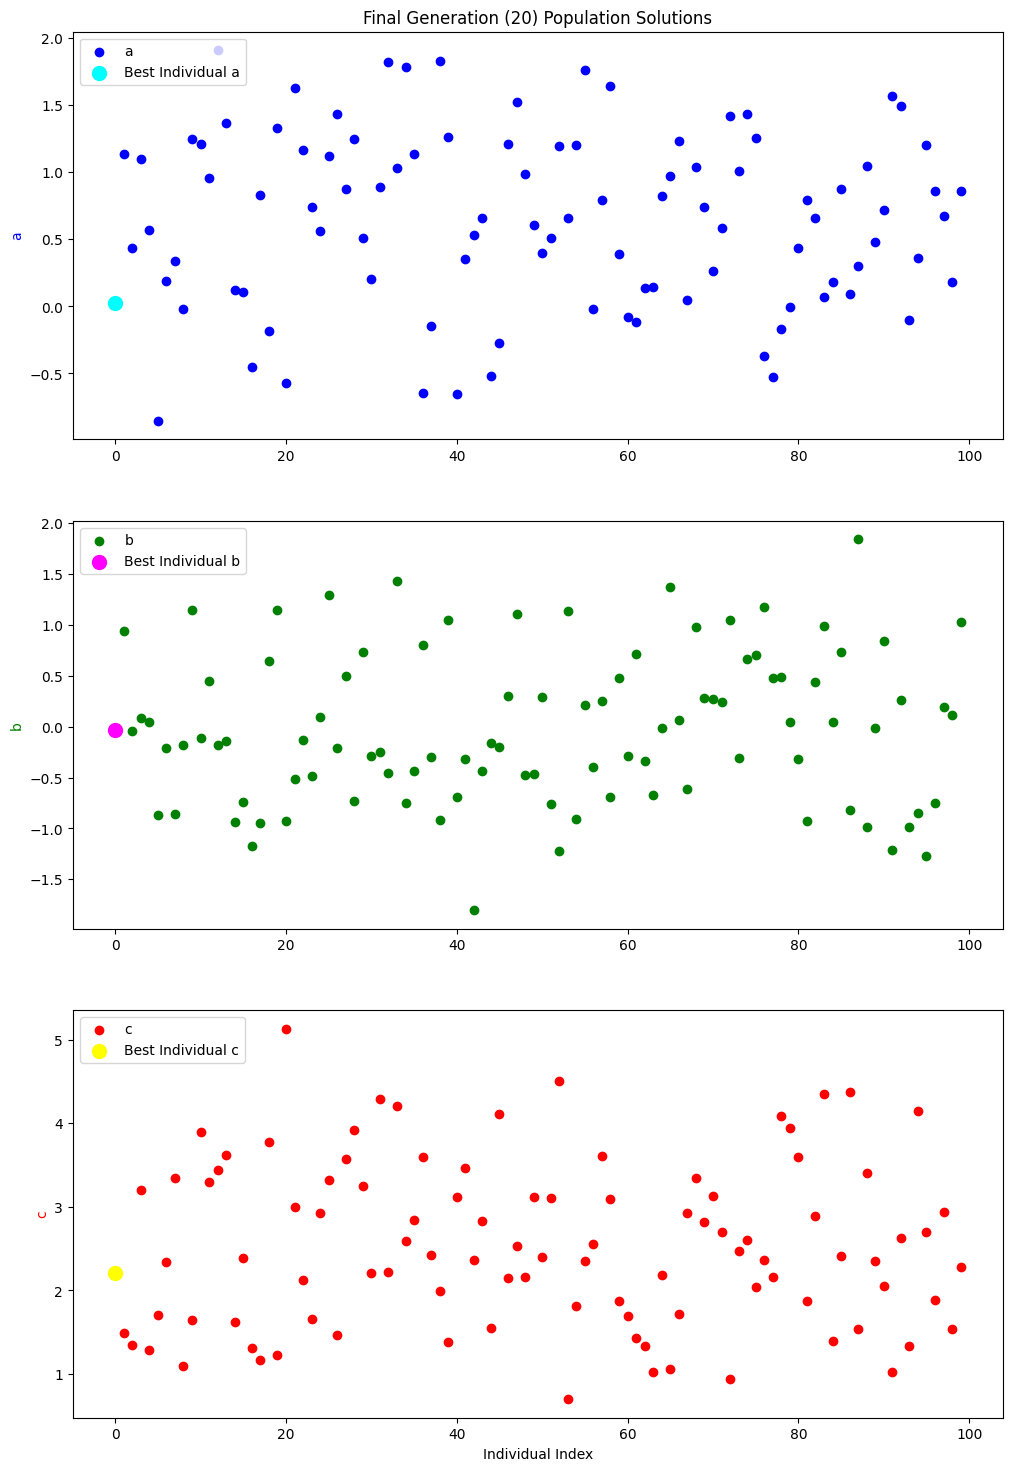

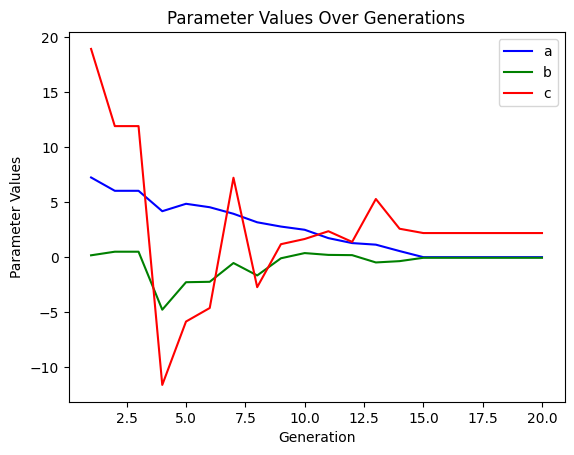

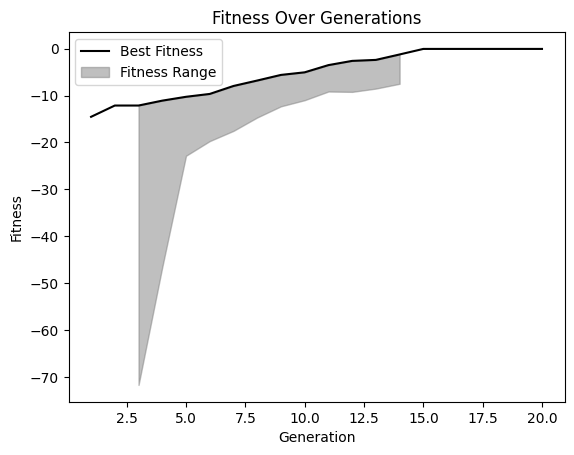

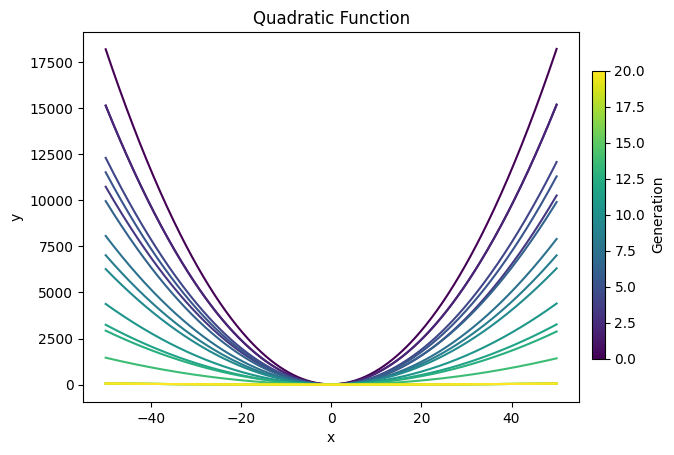

Best solution found: a = 0.023608647137023375, b = -0.03392465552421503, c = 2.2148738038490214


In [ ]:
# Parameters for the genetic algorithm
population_size = 100
lower_bound = -50
upper_bound = 50
generations = 20
mutation_rate = 1

# Run the genetic algorithm
best_solution = genetic_algorithm(population_size, lower_bound, upper_bound, generations, mutation_rate)
print(f"Best solution found: a = {best_solution[0]}, b = {best_solution[1]}, c = {best_solution[2]}")

In [ ]:
def termination_condition(fitnesses, target_fitness):
    return max(fitnesses) >= target_fitness

+------------+----------------------+-----------------------+---------------------+----------------------+
| Generation |          a           |           b           |          c          |       Fitness        |
+------------+----------------------+-----------------------+---------------------+----------------------+
|     1      |  6.488223631509626   |   -5.13828111361628   |  -28.02612889081695 | -15.011051362847638  |
|     2      |  6.488223631509626   |   -5.13828111361628   |  -28.02612889081695 | -15.011051362847638  |
|     3      |  5.7951146422170146  |  -2.9076984050753696  |  -23.20290648810269 | -12.319698029822245  |
|     4      |  4.867449478395164   |  -1.3239542105494337  |  -19.19093339803909 |  -9.914957810961479  |
|     5      |  4.033560219781557   |   -1.065028132562572  | -20.018742901757694 |  -8.207726363529106  |
|     6      |  3.956644320654422   |  -0.1404827041705783  | -16.201786139741348 |  -7.91578259686457   |
|     7      |  3.145084891384334   |

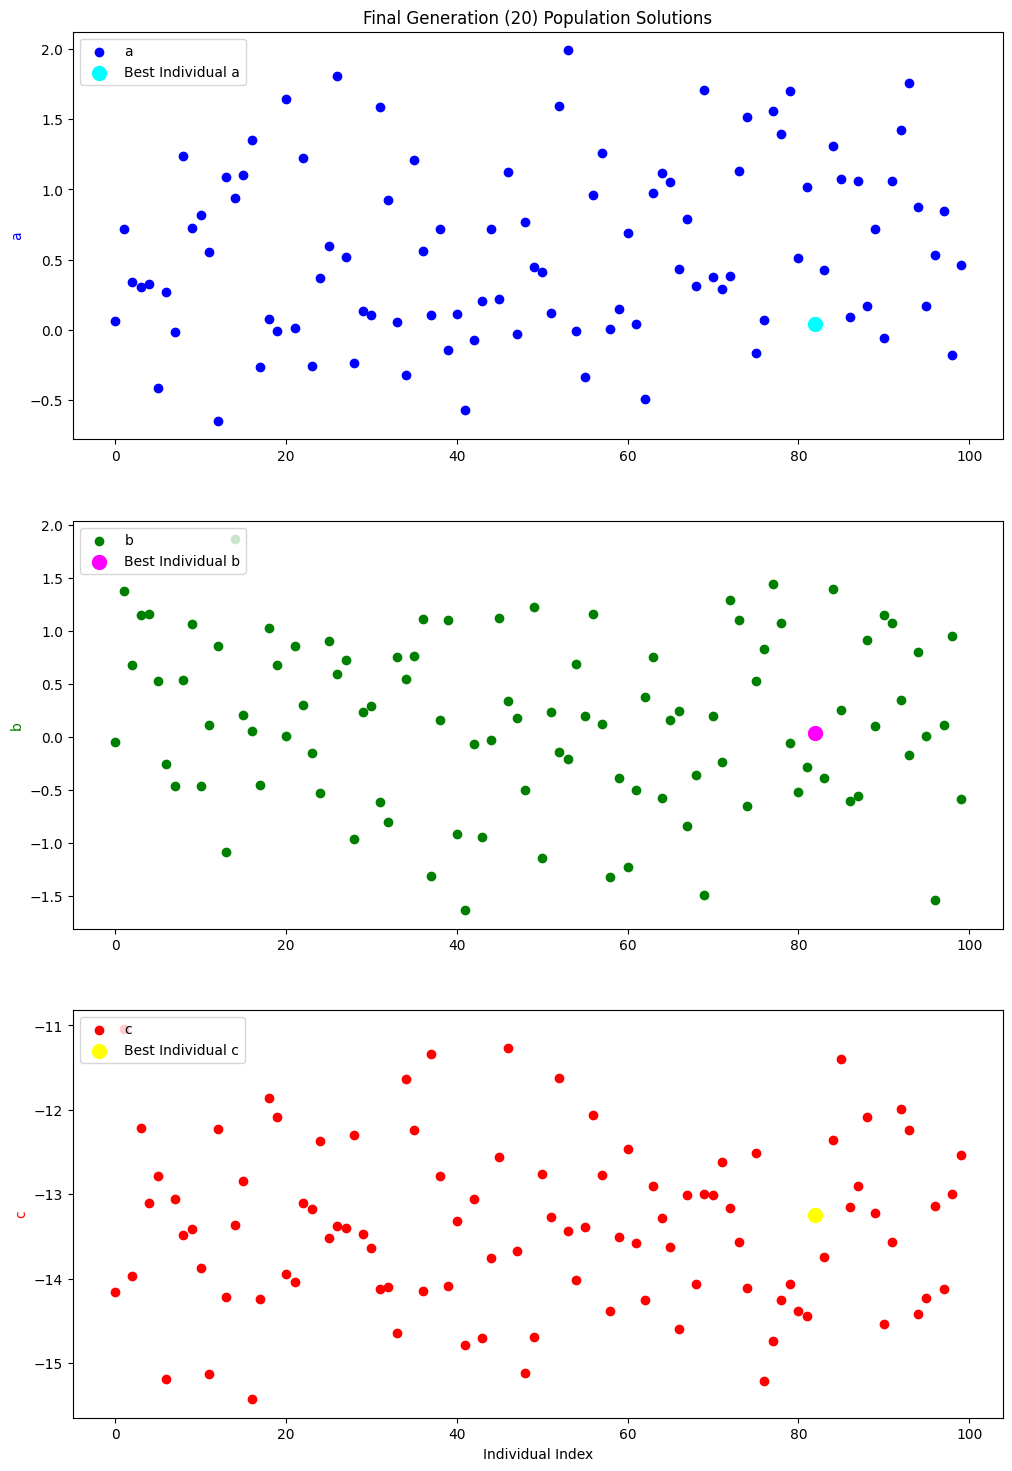

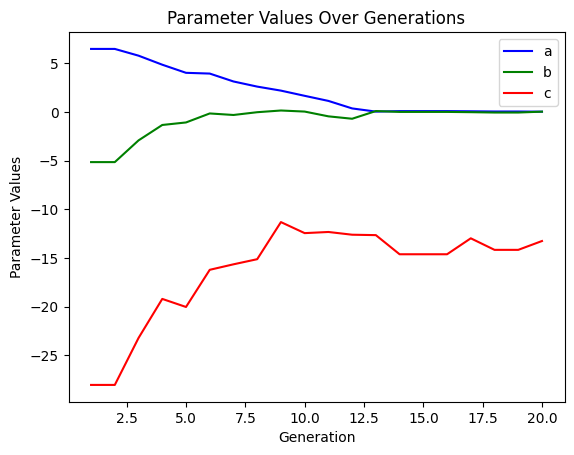

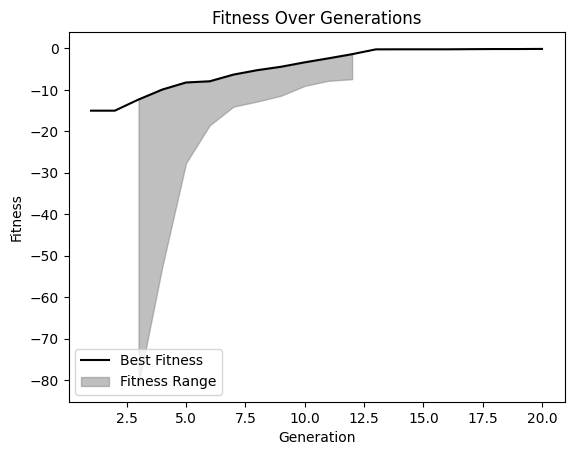

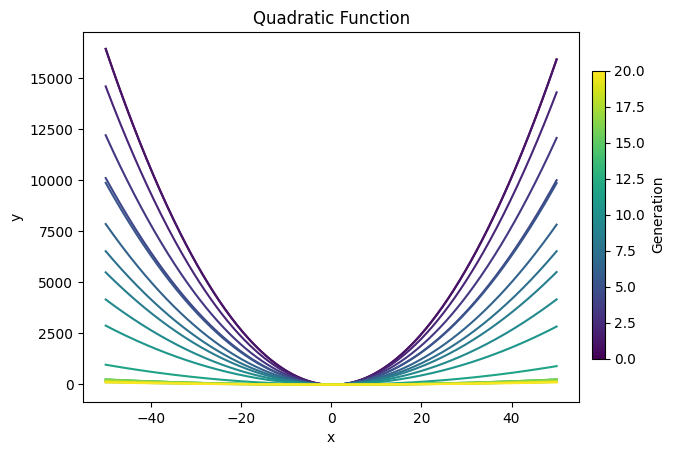

Best solution found: a = 0.041921498745005614, b = 0.04431716242814454, c = -13.244417478150233


In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
from prettytable import PrettyTable

# Define the fitness function (objective is to create the flattest U-shape)
def fitness_function(params):
    a, b, c = params
    if a <= 0:
        return -float('inf')  # Penalize downward facing u-shapes heavily
    vertex_x = -b / (2 * a) #x value at vertex
    vertex_y = a * (vertex_x ** 2) + b * vertex_x + c #y value at vertex
    y_left = a * (-1) ** 2 + b * (-1) + c #y-coordinate at x = -1
    y_right = a * (1) ** 2 + b * (1) + c #y-coordinate at x = 1
    curviness = abs(y_left - vertex_y) + abs(y_right - vertex_y)
    return -curviness  # Negate to minimize curviness

# Create the initial population
def create_initial_population(size, lower_bound, upper_bound):
    population = []
    for _ in range(size):
        individual = (random.uniform(lower_bound, upper_bound),
                      random.uniform(lower_bound, upper_bound),
                      random.uniform(lower_bound, upper_bound))
        population.append(individual)
    return population

# Selection function using tournament selection
def selection(population, fitnesses, tournament_size=3):
    selected = []
    for _ in range(len(population)):
        tournament = random.sample(list(zip(population, fitnesses)), tournament_size)
        winner = max(tournament, key=lambda x: x[1])[0]
        selected.append(winner)
    return selected

# Crossover function
def crossover(parent1, parent2):
    alpha = random.random()
    child1 = tuple(alpha * p1 + (1 - alpha) * p2 for p1, p2 in zip(parent1, parent2))
    child2 = tuple(alpha * p2 + (1 - alpha) * p1 for p1, p2 in zip(parent1, parent2))
    return child1, child2

# Mutation function
def mutation(individual, mutation_rate, lower_bound, upper_bound):
    individual = list(individual)
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            mutation_amount = random.uniform(-1, 1)
            individual[i] += mutation_amount
            # Ensure the individual stays within bounds
            individual[i] = max(min(individual[i], upper_bound), lower_bound)
    return tuple(individual)

# Main genetic algorithm function
def genetic_algorithm(population_size, lower_bound, upper_bound, generations, mutation_rate):
    population = create_initial_population(population_size, lower_bound, upper_bound)

    # Prepare for plotting
    fig, axs = plt.subplots(3, 1, figsize=(12, 18))  # 3 rows, 1 column for subplots
    best_performers = []
    all_populations = []

    # Prepare for table
    table = PrettyTable()
    table.field_names = ["Generation", "a", "b", "c", "Fitness"]

    for generation in range(generations):
        fitnesses = [fitness_function(ind) for ind in population]

        # Store the best performer of the current generation
        best_individual = max(population, key=fitness_function)
        best_fitness = fitness_function(best_individual)
        best_performers.append((best_individual, best_fitness))
        all_populations.append(population[:])
        table.add_row([generation + 1, best_individual[0], best_individual[1], best_individual[2], best_fitness])

        population = selection(population, fitnesses)

        next_population = []
        for i in range(0, len(population), 2):
            parent1 = population[i]
            parent2 = population[i + 1]

            child1, child2 = crossover(parent1, parent2)

            next_population.append(mutation(child1, mutation_rate, lower_bound, upper_bound))
            next_population.append(mutation(child2, mutation_rate, lower_bound, upper_bound))

        # Replace the old population with the new one, preserving the best individual
        next_population[0] = best_individual
        population = next_population

    # Print the table
    print(table)

    # Plot the population of one generation (last generation)
    final_population = all_populations[-1]
    final_fitnesses = [fitness_function(ind) for ind in final_population]

    axs[0].scatter(range(len(final_population)), [ind[0] for ind in final_population], color='blue', label='a')
    axs[0].scatter([final_population.index(best_individual)], [best_individual[0]], color='cyan', s=100, label='Best Individual a')
    axs[0].set_ylabel('a', color='blue')
    axs[0].legend(loc='upper left')

    axs[1].scatter(range(len(final_population)), [ind[1] for ind in final_population], color='green', label='b')
    axs[1].scatter([final_population.index(best_individual)], [best_individual[1]], color='magenta', s=100, label='Best Individual b')
    axs[1].set_ylabel('b', color='green')
    axs[1].legend(loc='upper left')

    axs[2].scatter(range(len(final_population)), [ind[2] for ind in final_population], color='red', label='c')
    axs[2].scatter([final_population.index(best_individual)], [best_individual[2]], color='yellow', s=100, label='Best Individual c')
    axs[2].set_ylabel('c', color='red')
    axs[2].set_xlabel('Individual Index')
    axs[2].legend(loc='upper left')

    axs[0].set_title(f'Final Generation ({generations}) Population Solutions')

    # Plot the values of a, b, and c over generations
    generations_list = range(1, len(best_performers) + 1)
    a_values = [ind[0][0] for ind in best_performers]
    b_values = [ind[0][1] for ind in best_performers]
    c_values = [ind[0][2] for ind in best_performers]
    fig, ax = plt.subplots()
    ax.plot(generations_list, a_values, label='a', color='blue')
    ax.plot(generations_list, b_values, label='b', color='green')
    ax.plot(generations_list, c_values, label='c', color='red')
    ax.set_xlabel('Generation')
    ax.set_ylabel('Parameter Values')
    ax.set_title('Parameter Values Over Generations')
    ax.legend()

    # Plot the fitness values over generations
    best_fitness_values = [fit[1] for fit in best_performers]
    min_fitness_values = [min([fitness_function(ind) for ind in population]) for population in all_populations]
    max_fitness_values = [max([fitness_function(ind) for ind in population]) for population in all_populations]
    fig, ax = plt.subplots()
    ax.plot(generations_list, best_fitness_values, label='Best Fitness', color='black')
    ax.fill_between(generations_list, min_fitness_values, max_fitness_values, color='gray', alpha=0.5, label='Fitness Range')
    ax.set_xlabel('Generation')
    ax.set_ylabel('Fitness')
    ax.set_title('Fitness Over Generations')
    ax.legend()

    # Plot the quadratic function for each generation
    fig, ax = plt.subplots()
    colors = plt.cm.viridis(np.linspace(0, 1, generations))
    for i, (best_ind, best_fit) in enumerate(best_performers):
        color = colors[i]
        a, b, c = best_ind
        x_range = np.linspace(lower_bound, upper_bound, 400)
        y_values = a * (x_range ** 2) + b * x_range + c
        ax.plot(x_range, y_values, color=color)

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Quadratic Function')

    # Create a subplot for the colorbar
    cax = fig.add_axes([0.92, 0.2, 0.02, 0.6])  # [left, bottom, width, height]
    norm = plt.cm.colors.Normalize(vmin=0, vmax=generations)
    sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
    sm.set_array([])
    fig.colorbar(sm, ax=ax, cax=cax, orientation='vertical', label='Generation')

    plt.show()

    return max(population, key=fitness_function)

# Parameters for the genetic algorithm
population_size = 100
lower_bound = -50
upper_bound = 50
generations = 20
mutation_rate = 1

# Run the genetic algorithm
best_solution = genetic_algorithm(population_size, lower_bound, upper_bound, generations, mutation_rate)
print(f"Best solution found: a = {best_solution[0]}, b = {best_solution[1]}, c = {best_solution[2]}")

# Genetic Algorithms in Python - Evolution For Optimization


* The algorithm consists in select the best answer by evolution. I mean, by choosing itermediate answer with the lower score till select the best one.

<br>
<br>

**One Max Problem**

Imagine we have this array: `[0, 1, 0, 0, 0]`. It's simples, we want the max of ones. That means, the best answer is `[1, 1, 1, 1, 1]`.

This is a really simple problem, all you have to to is compute the len of L (array) and fill with ones, so we're using just as ilustration.


---


Glossary

* Reprodution

* Selection -> select the best answers

* Mutation -> for exemplo, modify a bit (0 to 1).


* In this case, my population is L (array).


* Fits values -> How good is my solution.

* Cross-Over -> Combine two or more solutions.


In [ ]:
import random


POPULATION_SIZE = 1000
GENOME_LENGTH = 20
MUTATION_RATE = 0.01
CROSSOVER_RATE = 0.7
GENERATIONS = 200

def random_genome(length):
    return [random.randint(0, 1) for _ in range(length)]


random_genome(GENOME_LENGTH)

[1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0]

In [ ]:
def init_population(population_size, genome_length):
    return [random_genome(genome_length) for _ in range(population_size)]


init_population(POPULATION_SIZE, GENOME_LENGTH)


[[1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1],
 [1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1],
 [1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0],
 [1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0],
 [0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1],
 [1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
 [0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
 [1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0],
 [0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0],
 [0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0],
 [0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0],
 [1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,

In [ ]:
def fitness(genome):
    return sum(genome)


In [ ]:
def select_parent(population, fitness_values):
    total_fitness = sum(fitness_values)
    pick = random.uniform(0, total_fitness)
    current = 0

    for individual, fitness_value in zip(population, fitness_values):
        current += fitness_value
        if current > pick:
            return individual

In [ ]:
def crossover(parent1, parent2):
    if random.random() < MUTATION_RATE:
        crossover_point = random.randint(1, len(parent1) - 1)
        return parent1[:crossover_point] + parent2[crossover_point:], parent2[:crossover_point] + parent1[crossover_point:]

    else:
        return parent1, parent2

In [ ]:
def mutate(genome):
    for i in range(len(genome)):
        if random.random() < MUTATION_RATE:
            genome[i] = abs(genome[i] - 1)

    return genome

In [ ]:
def genetic_algorithm():
    population = init_population(POPULATION_SIZE, GENOME_LENGTH)

    for generation in range(GENERATIONS):
        fitness_values = [fitness(genome) for genome in population]

        new_population =[]

        for _ in range(POPULATION_SIZE // 2):
            parent1 = select_parent(population, fitness_values)
            parent2 = select_parent(population, fitness_values)

            offspring1, offspring2 = crossover(parent1, parent2)

            new_population.extend([mutate(offspring1), mutate(offspring2)])

        population = new_population

        fitness_values =  [fitness(genome) for genome in population]
        best_fitness = max(fitness_values)

        print(f'{generation} best Fitness {best_fitness}')

    best_index = fitness_values.index(max(fitness_values))
    best_solution = population[best_index]
    print(best_solution)
    print(fitness(best_solution))


genetic_algorithm()

0 best Fitness 17
1 best Fitness 17
2 best Fitness 18
3 best Fitness 18
4 best Fitness 17
5 best Fitness 17
6 best Fitness 17
7 best Fitness 17
8 best Fitness 17
9 best Fitness 17
10 best Fitness 17
11 best Fitness 18
12 best Fitness 16
13 best Fitness 16
14 best Fitness 17
15 best Fitness 16
16 best Fitness 16
17 best Fitness 16
18 best Fitness 15
19 best Fitness 16
20 best Fitness 16
21 best Fitness 17
22 best Fitness 16
23 best Fitness 15
24 best Fitness 16
25 best Fitness 14
26 best Fitness 14
27 best Fitness 15
28 best Fitness 17
29 best Fitness 15
30 best Fitness 17
31 best Fitness 16
32 best Fitness 16
33 best Fitness 16
34 best Fitness 16
35 best Fitness 17
36 best Fitness 16
37 best Fitness 16
38 best Fitness 16
39 best Fitness 16
40 best Fitness 15
41 best Fitness 14
42 best Fitness 15
43 best Fitness 15
44 best Fitness 14
45 best Fitness 15
46 best Fitness 15
47 best Fitness 14
48 best Fitness 16
49 best Fitness 16
50 best Fitness 15
51 best Fitness 15
52 best Fitness 15
53 